<h1>Selección de variables mediante Stepwise</h1>

In [1]:
proc import out= work.data
datafile= "/folders/myfolders/Econometria/asphalt_binder.csv" 
dbms=csv replace; getnames=yes; datarow=2; 
run;



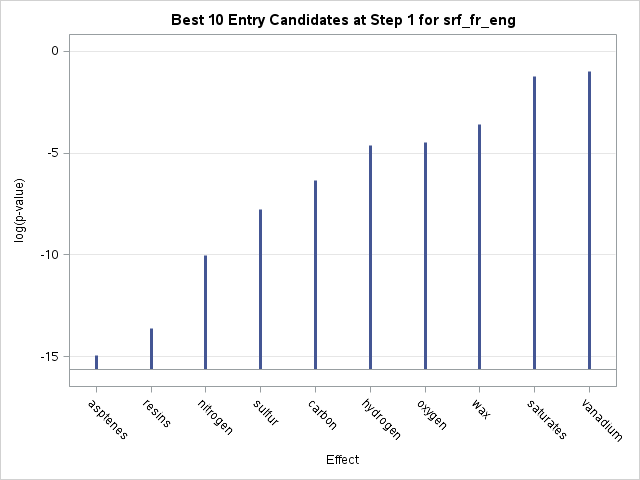
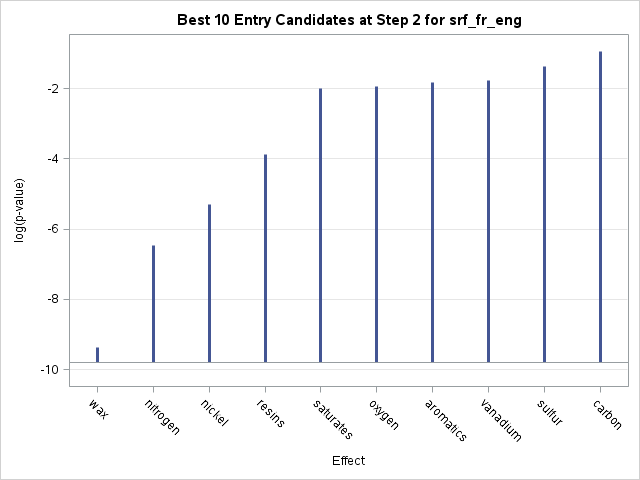
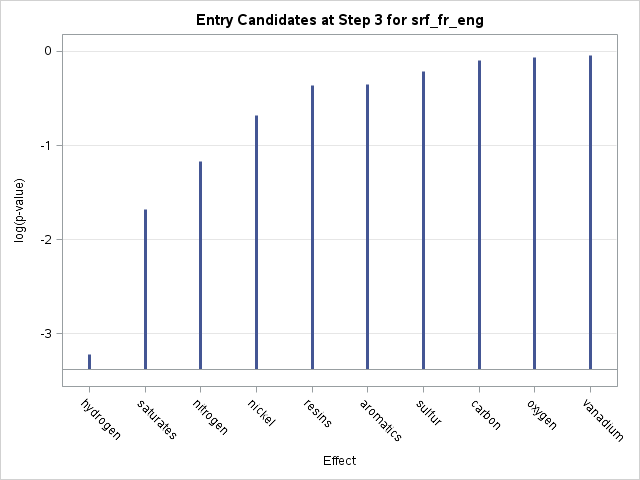
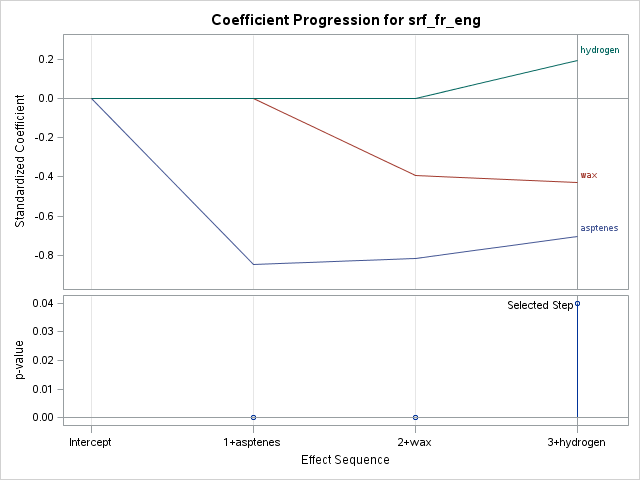
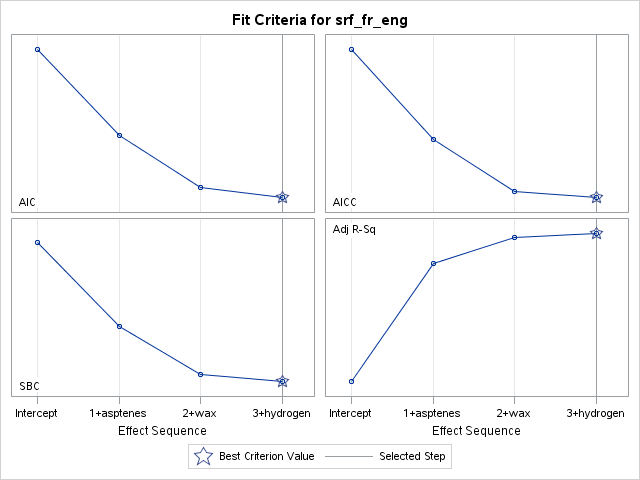
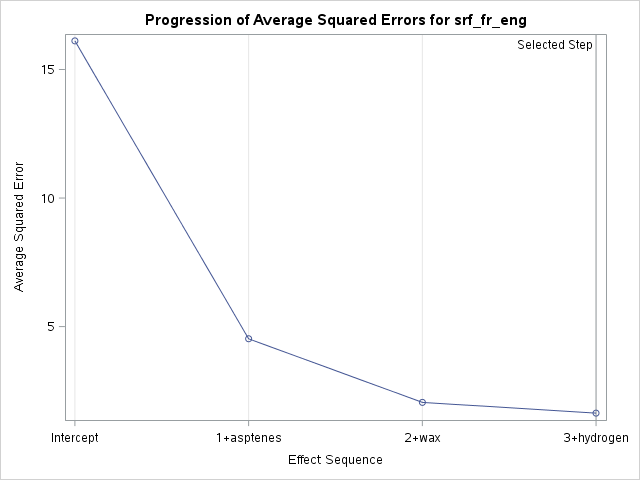
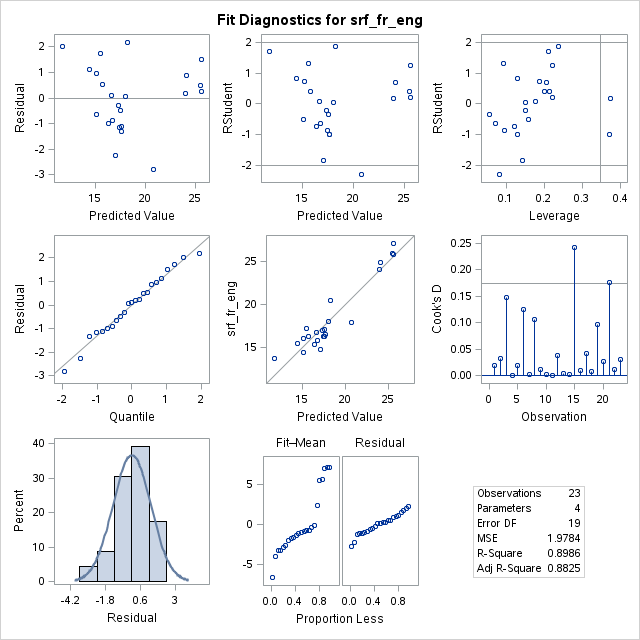
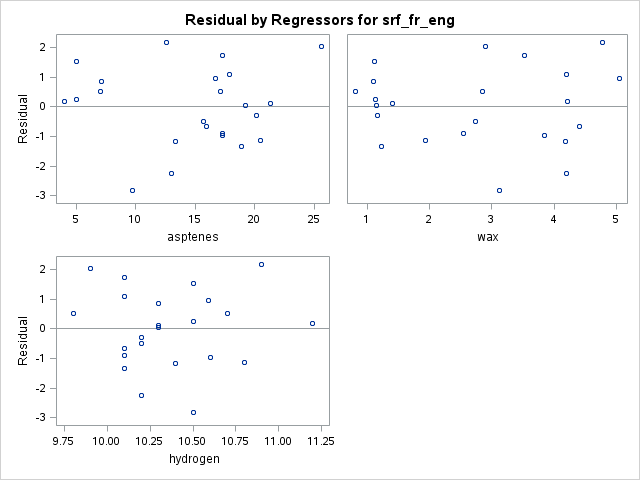
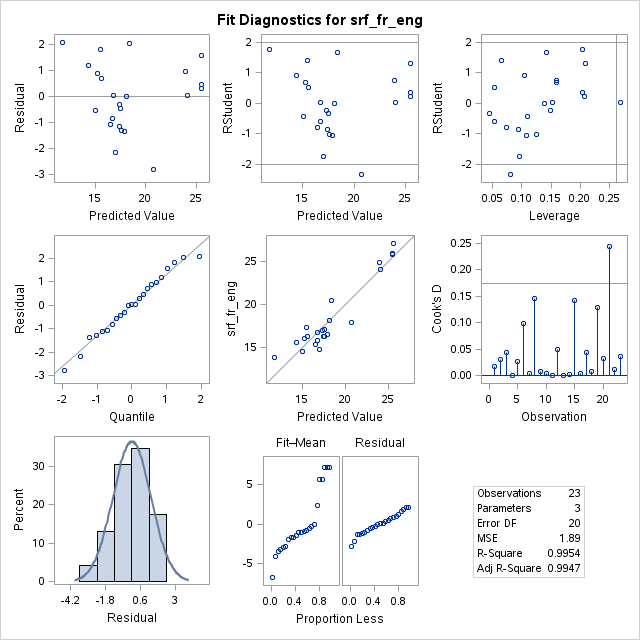
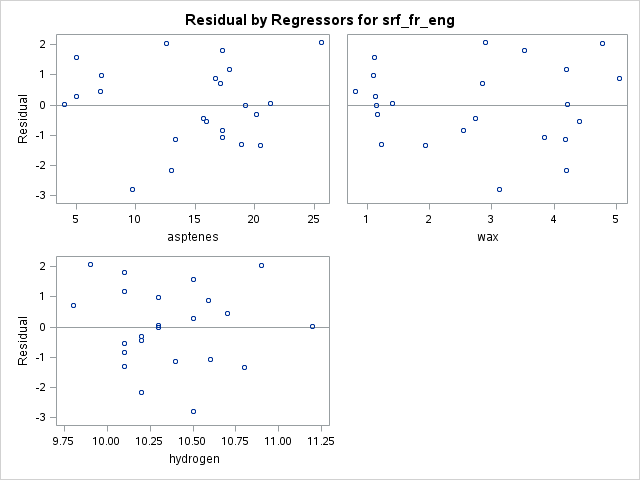

In [2]:
%let xlist = saturates aromatics resins asptenes wax carbon hydrogen oxygen nitrogen sulfur nickel vanadium;

proc glmselect data=work.data plots=all;
   model srf_fr_eng=&xlist / selection=stepwise
                   details=steps select=SL slstay=0.05 slentry=0.05;
   title "Modelo mediante la selección Stepwise";
run;
quit;


PROC REG DATA =WORK.data ; 
	model srf_fr_eng = asptenes wax hydrogen / VIF SPEC DW;

title 'Validación del modelo, colinealidad de regresores, significancia de los parámetros';
   output out=out residual=r;	
run;
quit;


proc univariate data=out normal; /* Anderson-Darling */
	var r;
	title 'Normalidad: Anderson-Darling ';
run;
quit;


PROC REG DATA =WORK.data ; 
	model srf_fr_eng = asptenes wax hydrogen / noint VIF SPEC DW;

title 'Validación del modelo, colinealidad de regresores, significancia de los parámetros';
   output out=out residual=r;	
run;
quit;


proc univariate data=out normal; /* Anderson-Darling */
	var r;
	title 'Normalidad: Anderson-Darling ';
run;
quit;
